#Libraries


In [4]:
# importing packages
import pandas as pd
import numpy as np
from numpy import array
import matplotlib as mpl

# for plots
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import date2num

# for date and time processing
import datetime

# for statistical graphs
import seaborn as sns

#File import from Drive

In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title cities_r2.csv, id 1OW1lxTfCDMTeSmguusOi7VAX2xbT8QSZ
title naukri_com-job_sample.csv, id 1uAoRQmUQGllCxGAWB5YKLcx9g1FQkhOe


In [7]:
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1OW1lxTfCDMTeSmguusOi7VAX2xbT8QSZ'
downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [8]:
file_id = '1uAoRQmUQGllCxGAWB5YKLcx9g1FQkhOe'
downloaded1= drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [9]:
downloaded.GetContentFile('cities.csv')

In [10]:
downloaded1.GetContentFile('employee.csv')

#**analysing** **data**

In [11]:
data_set = pd.read_csv("cities.csv")

In [12]:
emp_set = pd.read_csv("employee.csv")

In [13]:
data_set.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [14]:
data_set.shape

(493, 22)

In [15]:
data_set.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [16]:
data_set.describe()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [17]:
data_set.count()

name_of_city                      493
state_code                        493
state_name                        493
dist_code                         493
population_total                  493
population_male                   493
population_female                 493
0-6_population_total              493
0-6_population_male               493
0-6_population_female             493
literates_total                   493
literates_male                    493
literates_female                  493
sex_ratio                         493
child_sex_ratio                   493
effective_literacy_rate_total     493
effective_literacy_rate_male      493
effective_literacy_rate_female    493
location                          493
total_graduates                   493
male_graduates                    493
female_graduates                  493
dtype: int64

In [18]:
data_set.describe()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [19]:
emp_set.head(10)

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4
5,PFS Web Global Services Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:MCA - ...,2 - 5 yrs,IT-Software / Software Services,Job Description Send me Jobs like this We ar...,131016005070,Bengaluru,WALK IN - As400 Developer - Pfsweb Global Serv...,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,8c3af9062ea835b0965779e2c7faac76
6,Kinesis Management Consultant Pvt. Ltd,NaN,1 - 3 yrs,IT-Software / Software Services,Job Description Send me Jobs like this exper...,131016004451,"Delhi NCR, Mumbai, Bengaluru, Kochi, Greater N...",PHP Developer,2.0,"3,00,000 - 6,50,000 P.A",2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,98f84958cd6409386e7f0c9e447b8510
7,Agile HR consultancy Pvt. Ltd. hiring for Ross...,"UG: Diploma - Any Specialization, Electrical, ...",2 - 7 yrs,Aviation / Aerospace Firms,Job Description Send me Jobs like this Job D...,121016002995,Bengaluru,Member Technical Staff-wire Harness/cable Harn...,20.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Production,c811c10568fdbfdb3d5e633c99c914b4
8,HANSUM INDIA ELECTRONICS PVT.LTD.,"UG: Diploma - Any Specialization, Electronics/...",1 - 3 yrs,Industrial Products / Heavy Machinery,Job Description Send me Jobs like this Indep...,131016002120,Bengaluru,Team Leader,2.0,"1,00,000 - 2,00,000 P.A",2016-10-13 16:20:55 +0000,NaN,Production,a40cb270401af0c246dbe60dcf219262
9,Accenture,UG: Any Graduate - Any Specialization PG:Any P...,1 - 5 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Overa...,121016901354,Bengaluru,German Translator,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,ITES,7774df1c672c0b92486da8b36a721638


In [20]:
emp_set.shape

(22000, 14)

In [21]:
emp_thin = emp_set[['joblocation_address','numberofpositions']]

In [22]:
emp_thin.head(16)

,joblocation_address,numberofpositions
0,Chennai,NaN
1,Chennai,60.0
2,Bengaluru,NaN
3,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",NaN
4,Bengaluru,4.0
5,Bengaluru,NaN
6,"Delhi NCR, Mumbai, Bengaluru, Kochi, Greater N...",2.0
7,Bengaluru,20.0
8,Bengaluru,2.0
9,Bengaluru,NaN


In [23]:
emp_thin['joblocation_address'].count()

21499

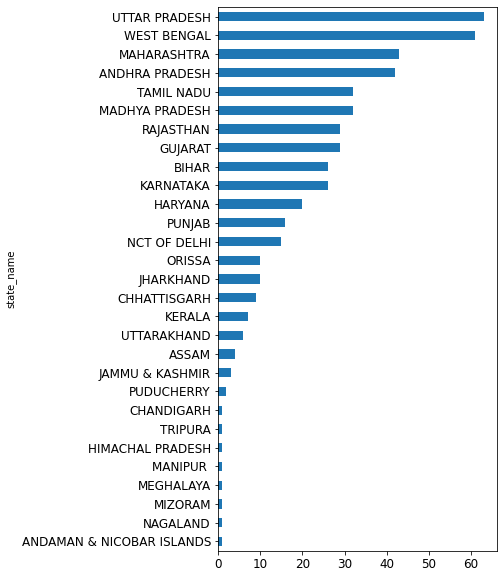

In [24]:
data_set.groupby('state_name').total_graduates.count().sort_values(ascending = True).plot(kind = 'barh',label = 'total_graduates',figsize = (5,10),fontsize = 12)

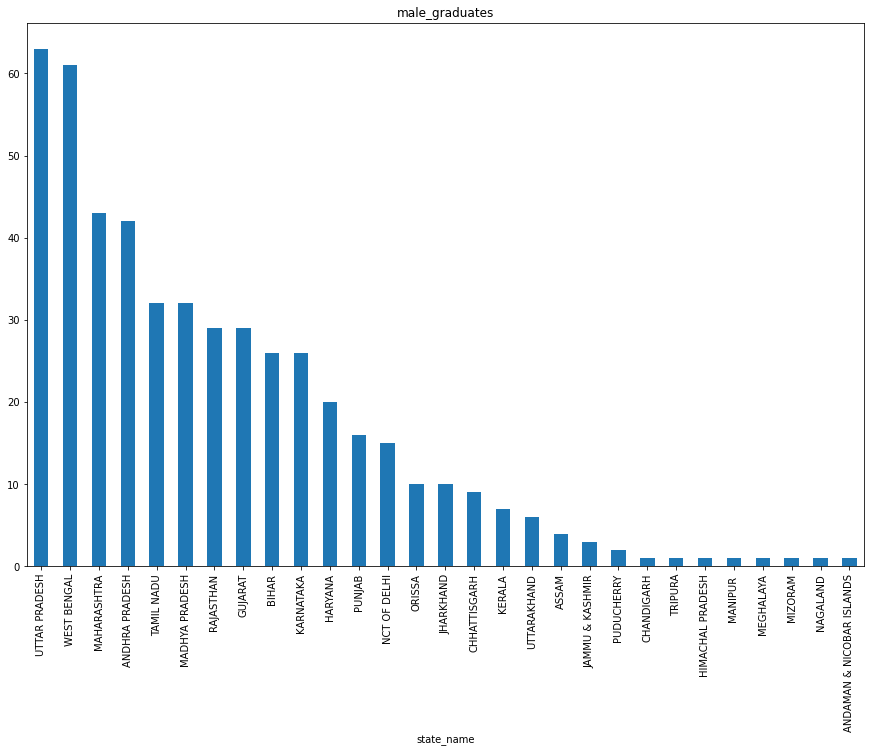

In [25]:
data_set.groupby('state_name').male_graduates.count().sort_values(ascending = False).plot(title = 'male_graduates', kind = 'bar',label = 'male_graduates',figsize = (15,10))

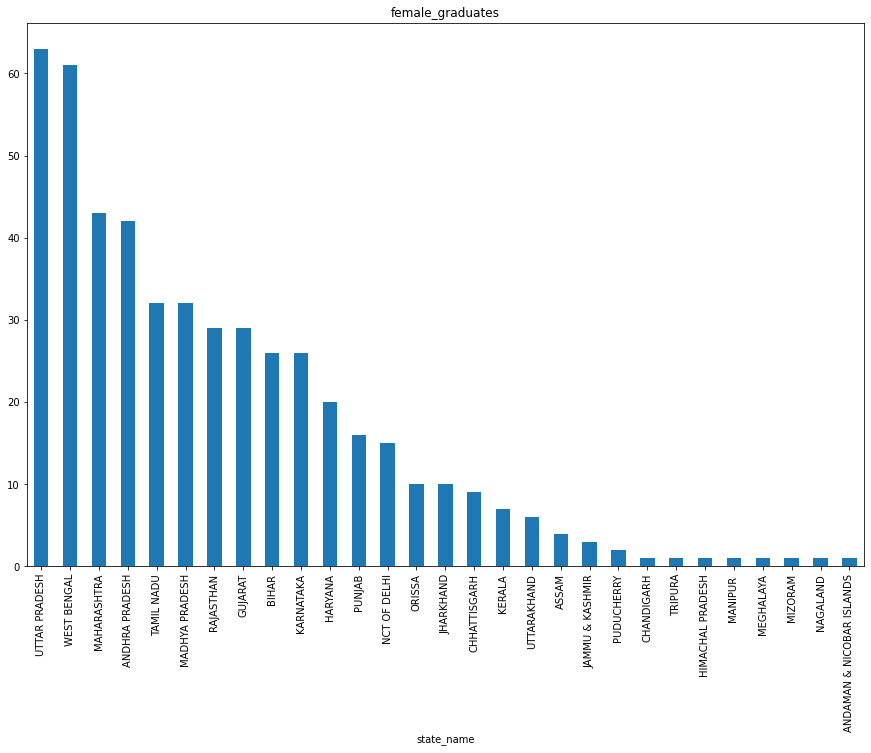

In [26]:
data_set.groupby('state_name').female_graduates.count().sort_values(ascending = False).plot(title = 'female_graduates', kind = 'bar',label = 'female_graduates',figsize = (15,10))

#Finding correlation

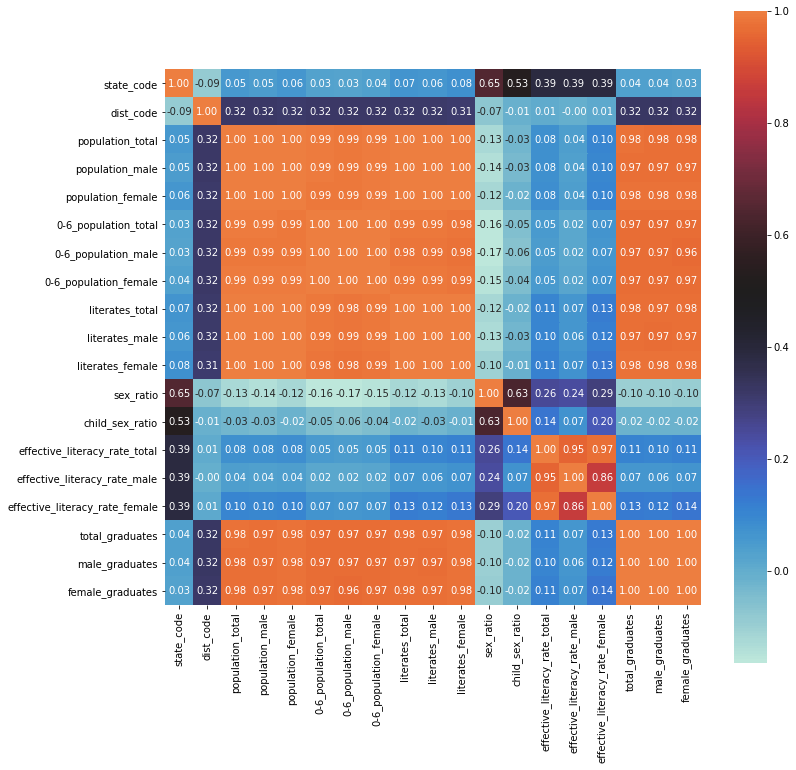

In [27]:
corrmat = data_set.corr()
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(corrmat, vmax = 1,square = True,annot = True,fmt = '.2f', center = 0.5)
plt.show()

In [28]:
data_set_thin = data_set[['state_name','population_total','population_male','population_female','literates_total','literates_male','literates_female','total_graduates','male_graduates','female_graduates']]

In [29]:
data_set_thin.head()

,state_name,population_total,population_male,population_female,literates_total,literates_male,literates_female,total_graduates,male_graduates,female_graduates
0,PUNJAB,145238,76840,68398,103319,58347,44972,16287,8612,7675
1,MAHARASHTRA,112293,58256,54037,92433,49347,43086,8863,5269,3594
2,ANDHRA PRADESH,117388,59232,58156,83955,46295,37660,10565,6797,3768
3,JHARKHAND,173988,91495,82493,125985,71470,54515,19225,12189,7036
4,ANDHRA PRADESH,166537,82743,83794,101292,56203,45089,11902,7871,4031


In [30]:
sns.set()

#Finding Trend in data set

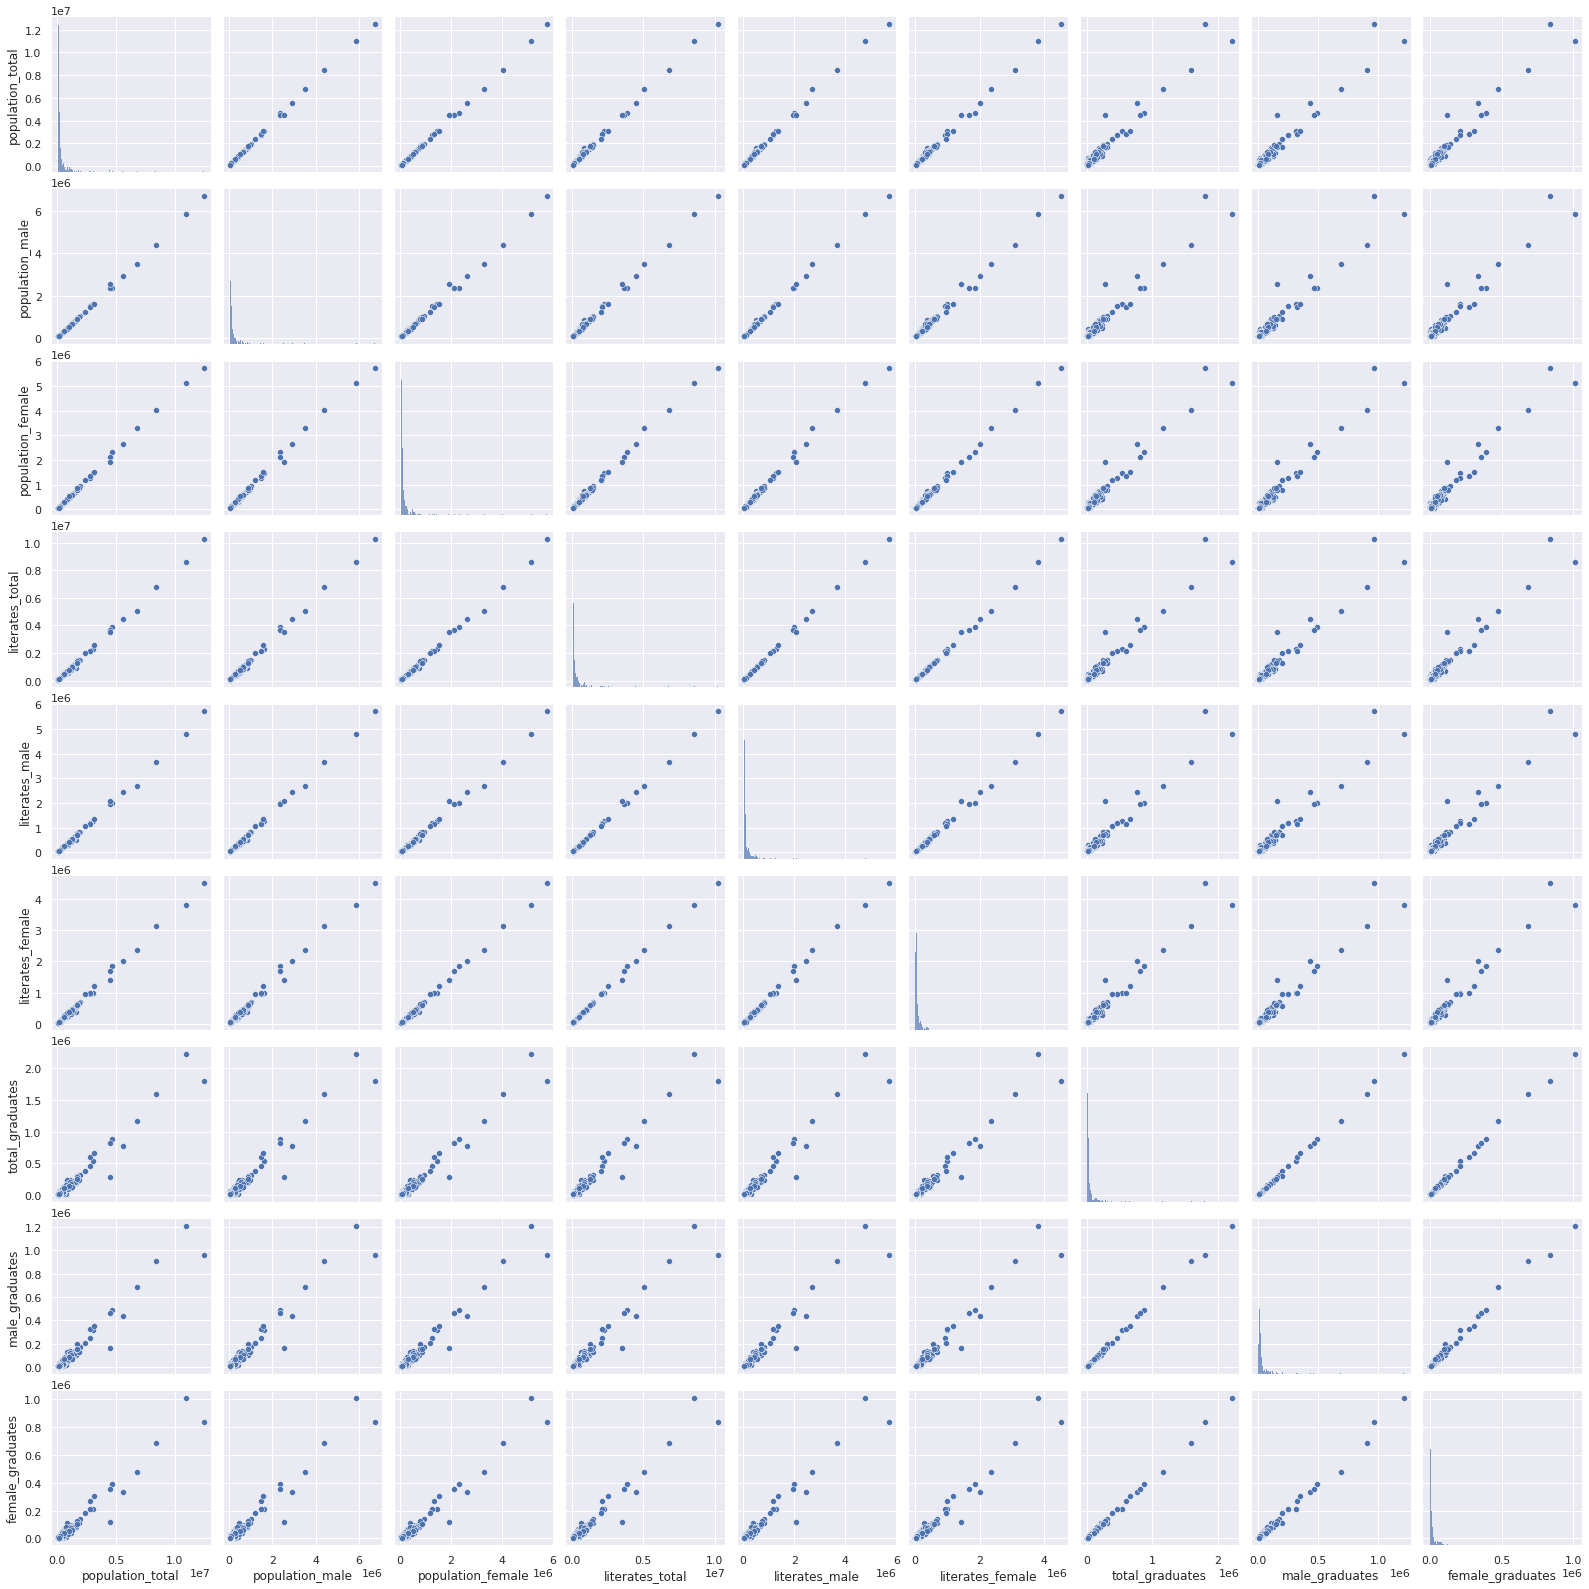

In [31]:
sns.pairplot(data_set_thin,diag_kind='hist')

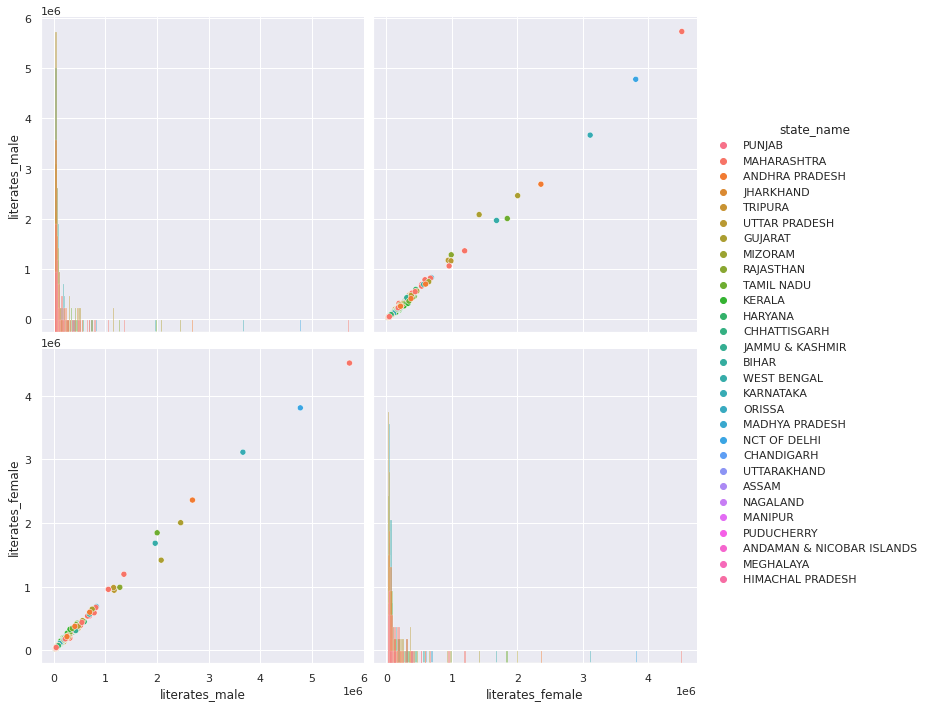

In [32]:
sns.pairplot(data_set_thin[['literates_male','literates_female','state_name']],diag_kind='hist',hue = 'state_name',height= 5)

#Learning Algorithms


In [33]:

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
load = dftrain
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

In [34]:
import sklearn.preprocessing as preprocessing

In [35]:
le = preprocessing.LabelEncoder()
dftrain['sex'] = le.fit_transform(dftrain['sex'].astype(str))
dftrain['class'] = le.fit_transform(dftrain['class'].astype(str))
dftrain['deck'] = le.fit_transform(dftrain['deck'].astype(str))
dftrain['embark_town'] = le.fit_transform(dftrain['embark_town'].astype(str))
dftrain['alone'] = le.fit_transform(dftrain['alone'].astype(str))
dfeval['sex'] = le.fit_transform(dfeval['sex'].astype(str))
dfeval['class'] = le.fit_transform(dfeval['class'].astype(str))
dfeval['deck'] = le.fit_transform(dfeval['deck'].astype(str))
dfeval['embark_town'] = le.fit_transform(dfeval['embark_town'].astype(str))
dfeval['alone'] = le.fit_transform(dfeval['alone'].astype(str))

In [36]:
x = dftrain[['sex','deck','class','alone']]
y = dftrain['survived']

In [37]:
from sklearn.svm import SVC

In [67]:
classifier = SVC()
classifier.fit(x,y)
score = classifier.score(x,y)
result = list(classifier.predict(x))
print(score * 100)
print(result)

80.54226475279107
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 

In [39]:
from sklearn import linear_model

In [68]:
reg = linear_model.LinearRegression()
reg.fit (x,y)
reg_score = reg.score(x,y)
reg_result = list(reg.predict(x))
print(reg_score * 100)
print(reg_result)

40.586244044220756
[0.09044733723143727, 0.958833894479862, 0.6523797354030889, 0.958833894479862, 0.09305126048880497, 0.09044733723143727, 0.6497758121457211, 0.7759920315055183, 0.6611009408686305, 0.09305126048880497, 0.09044733723143727, 0.6523797354030889, 0.09044733723143727, 0.21926747984860218, 0.6497758121457211, 0.6523797354030889, 0.21926747984860218, 0.42475960026876436, 0.6497758121457211, 0.09305126048880497, 0.39950541956557806, 0.6523797354030889, 0.09305126048880497, 0.3454836992083993, 0.9701590232027713, 0.6523797354030889, 0.21926747984860218, 0.3428797759510315, 0.3428797759510315, 0.09305126048880497, 0.6497758121457211, 0.6497758121457211, 0.7759920315055183, 0.09305126048880497, 0.7759920315055183, 0.09305126048880497, 0.09044733723143727, 0.09044733723143727, 0.6497758121457211, 0.09044733723143727, 0.9475087657569528, 0.7759920315055183, 0.4108305482884874, 0.40210934282294575, 0.778595954762886, 0.09305126048880497, 0.09044733723143727, 0.09305126048880497, 

In [41]:
from sklearn import tree

In [69]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)
tree_score = clf.score(x,y)
tree_result = list(clf.predict(x))
print(tree_score * 100)
print(tree_result)

82.13716108452951
[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 

#Ensemble

In [66]:
linear_results = []
for each in reg_result:
  linear_results.append(round(each))
sum = 0
correct_cnt = 0
#print(int(load.loc[0]['survived']))
for i in range (0, 627):
  sum = linear_results[i] + tree_result[i] + result[i]
  if sum >= 2 and int(load.loc[i]['survived']) == 1:
    correct_cnt += 1
  elif sum <= 2 and int(load.loc[i]['survived']) == 0:
    correct_cnt += 1
#print(correct_cnt)
prediction_acc = correct_cnt/len(result)
print(prediction_acc * 100)

85.00797448165869
